<a href="https://colab.research.google.com/github/garrettfenchel/Coding-Dojo-Predicting-Poverty/blob/main/Predicting_Poverty_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data Import


In [1]:
pip install -U matplotlib #Run, restart runtime and run import

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
poverty_original = pd.read_excel("/content/drive/MyDrive/Work/Unilever/Data Science/Project 2/Poverty Data.xlsx")


In [5]:
poverty_clean = poverty_original
poverty_clean

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,C,True,50.0,False,True,P,Head,1.0,True,...,True,False,False,False,False,False,2,0,1,0.990
12596,12596,D,False,90.0,False,False,O,Head,0.0,True,...,False,False,False,False,False,False,0,0,0,0.950
12597,12597,J,False,52.0,True,False,X,Head,1.0,False,...,True,False,False,False,True,False,0,1,0,0.342
12598,12598,I,False,40.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.846


In [6]:
poverty_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   row_id                                 12600 non-null  int64  
 1   country                                12600 non-null  object 
 2   is_urban                               12600 non-null  bool   
 3   age                                    12600 non-null  float64
 4   female                                 12600 non-null  bool   
 5   married                                12600 non-null  bool   
 6   religion                               12600 non-null  object 
 7   relationship_to_hh_head                12600 non-null  object 
 8   education_level                        12364 non-null  float64
 9   literacy                               12600 non-null  bool   
 10  can_add                                12600 non-null  bool   
 11  ca

# Data Cleanup

In [7]:
#Checking duplicates
poverty_clean[poverty_clean.duplicated()]

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability


In [8]:
#Lots of null values in these columns, dropping columns from analysis
poverty_clean = poverty_clean.drop(["bank_interest_rate","mm_interest_rate","mfi_interest_rate","other_fsp_interest_rate"], axis=1) 

In [9]:
#Dropping any other nulls observations, there are very few compared to total list
poverty_clean = poverty_clean.dropna() 

In [ ]:
#Checking categorical variables values and their counts, rerun for each variable
poverty_clean.value_counts(["phone_technology"])


phone_technology
0                   4191
2                   2966
1                   2936
3                   1957
dtype: int64

In [10]:
#Reviewing Mins and Max values to look for irregular values, none foun
poverty_clean.describe()

,row_id,age,education_level,share_hh_income_provided,num_times_borrowed_last_year,borrowing_recency,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,1.206800e+04,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000
mean,6312.377776,36.276185,1.316291,2.888300,0.660093,0.872058,1.103580,5.587780e+14,1.223318,1.482516,0.729616,0.194564,1.600099,0.608857
std,3636.571928,15.037812,0.903742,1.564646,0.923874,0.961187,1.191547,3.747873e+15,1.092899,0.767563,0.807724,0.480080,2.058281,0.291270
min,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3170.750000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.394000
50%,6310.500000,33.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000e+00,1.000000,2.000000,1.000000,0.000000,1.000000,0.633000
75%,9461.250000,45.000000,2.000000,5.000000,1.000000,2.000000,2.000000,4.000000e+00,2.000000,2.000000,1.000000,0.000000,3.000000,0.879000
max,12599.000000,115.000000,3.000000,5.000000,3.000000,2.000000,5.000000,3.666667e+16,3.000000,2.000000,6.000000,4.000000,10.000000,1.000000


In [11]:
#Replacing boolean values with 0 and 1
poverty_clean = poverty_clean.replace(True,1)
poverty_clean = poverty_clean.replace(False,0)

In [12]:
#Dropping observations with "Unknown" relationship to HH head, treating as Null
poverty_clean = poverty_clean[poverty_clean['relationship_to_hh_head'] != "Unknown"]

In [13]:
#Create Poverty Boolean outcome variable 
def f_poverty(a):
  if a > .499999:
    return 1 
  else:
    return 0
poverty_clean["poverty_bool"] = np.vectorize(f_poverty)(poverty_clean["poverty_probability"])


In [14]:
#Religion Counts
poverty_clean.value_counts(["religion"])

religion
X           5182
Q           5114
P           1617
O             84
N             53
dtype: int64

In [15]:
#Combine O and N religion, low frequency 
def f_religion(a):
  if a == "O" or a == "N":
    return "O_N" 
  else:
    return a
poverty_clean["religion_clean"] = np.vectorize(f_religion)(poverty_clean["religion"])

In [16]:
#Combining Math Skills
def f_math(a,b,c,d):
    return int (a)+b+c+d
poverty_clean["math_skill"] = np.vectorize(f_math)(poverty_clean["can_add"],poverty_clean["can_divide"],poverty_clean["can_calc_percents"],poverty_clean["can_calc_compounding"])

In [17]:
#Combining Bank variables
def f_bank(a,b,c,d,e):
    return int (a)+b+c+d+e
poverty_clean["bank_skill"] = np.vectorize(f_bank)(poverty_clean["active_bank_user"],poverty_clean["active_mm_user"],poverty_clean["active_formal_nbfi_user"],poverty_clean["active_informal_nbfi_user"],poverty_clean["nonreg_active_mm_user"])

In [18]:
#Combining Savings variables
def f_savings(a,b,c):
    return int (a)+b+c
poverty_clean["savings"] = np.vectorize(f_savings)(poverty_clean["formal_savings"],poverty_clean["informal_savings"],poverty_clean["cash_property_savings"])


In [19]:
#Creating age groups
def f_age(a):
  if a < 18:
    return "15-18"
  elif a < 41:
    return "18-40"
  elif a < 65:
    return "40-60"
  else:
    return "65+"

poverty_clean["age_groups"] = np.vectorize(f_age)(poverty_clean["age"])

In [20]:
#Creating integer variables for categorical variables 
poverty_clean['religion_n'] = pd.factorize(poverty_clean['religion_clean'])[0]
poverty_clean['country_n'] = pd.factorize(poverty_clean['country'])[0]
poverty_clean['relationship_to_hh_head_n'] = pd.factorize(poverty_clean['relationship_to_hh_head'])[0]
poverty_clean['employment_type_last_year_n'] = pd.factorize(poverty_clean['employment_type_last_year'])[0]
poverty_clean['age_groups_n'] = pd.factorize(poverty_clean['age_groups'])[0]


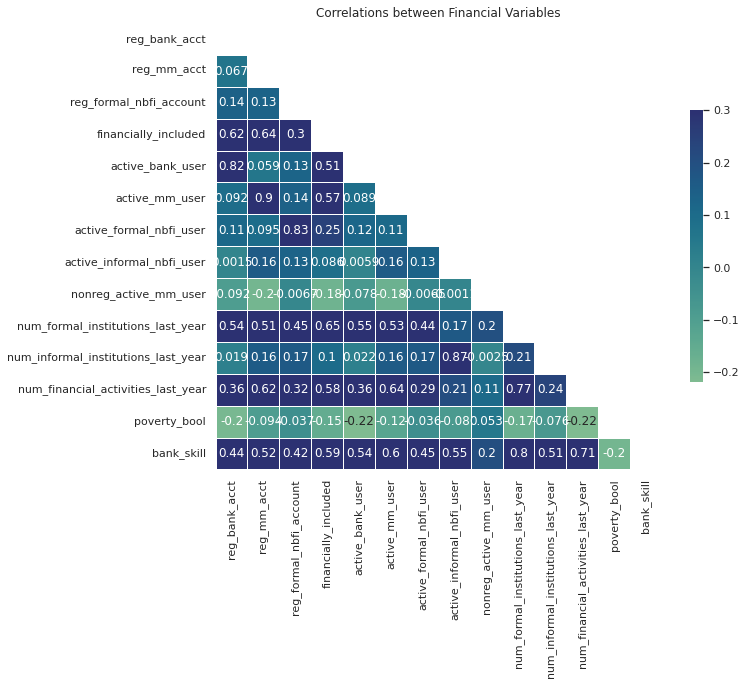

In [26]:
#Comparing which Financial Activities to use
#Choosing "Number Financial Activities Last Year"

compare = poverty_clean[['reg_bank_acct', 'reg_mm_acct',
       'reg_formal_nbfi_account', 'financially_included','active_bank_user',
       'active_mm_user', 'active_formal_nbfi_user',
       'active_informal_nbfi_user', 'nonreg_active_mm_user',
       'num_formal_institutions_last_year',
       'num_informal_institutions_last_year',
       'num_financial_activities_last_year',
       'poverty_bool',"bank_skill"]]

correlation= compare.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
mask = np.triu(np.ones_like(correlation, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap="crest", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

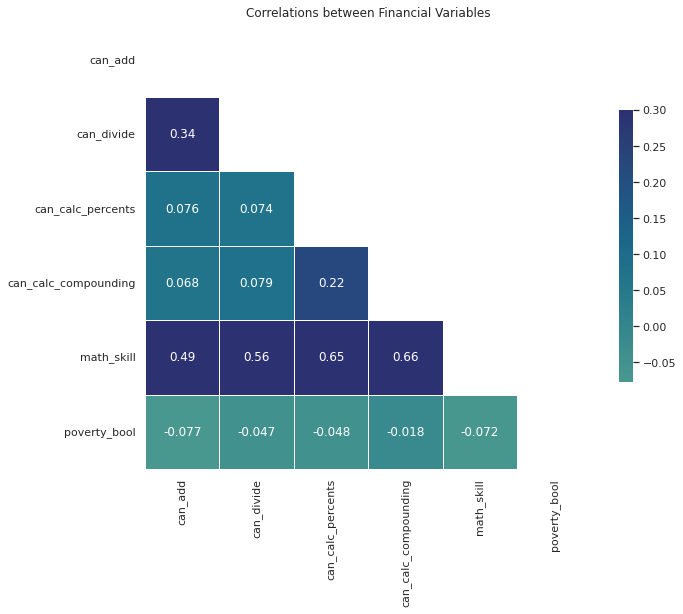

In [27]:
#Comparing which Math Skill to use
#Choosing "Math Skill"

compare = poverty_clean[['can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',"math_skill","poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap="crest", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

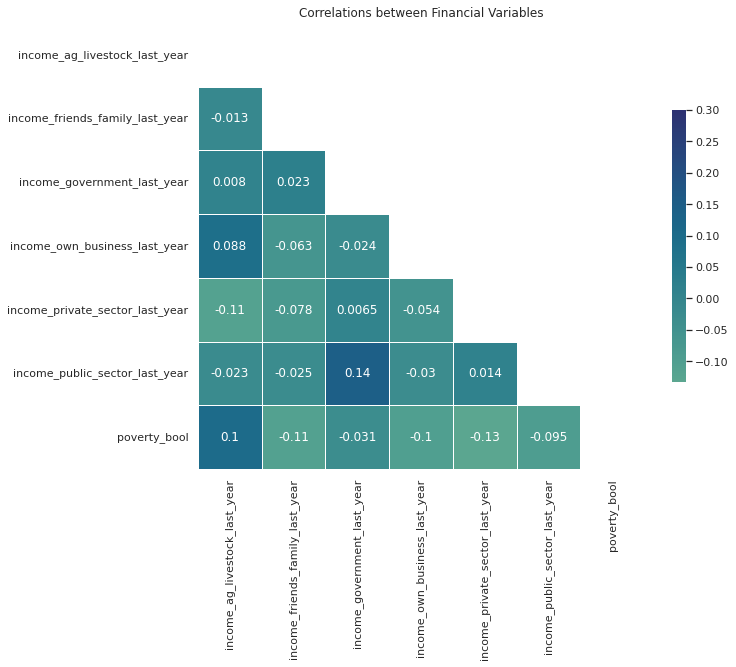

In [28]:
#Comparing Income Sources
#Leaving them all in, colinearity is low

compare = poverty_clean[['income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',"poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap="crest", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

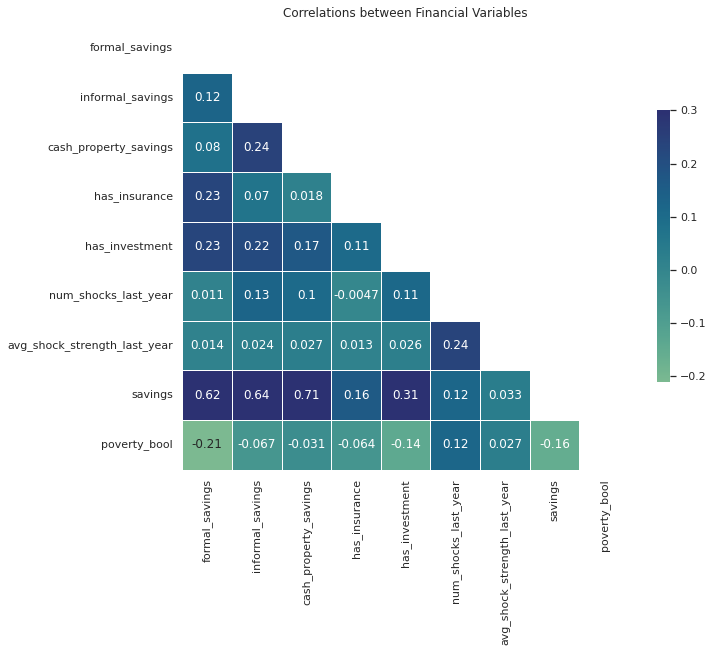

In [29]:
#Comparing Savings
#Keeping "Formal Savings", "Number of Shocks", "Has Insurance"

compare = poverty_clean[['formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year',
       'avg_shock_strength_last_year',"savings","poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap="crest", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

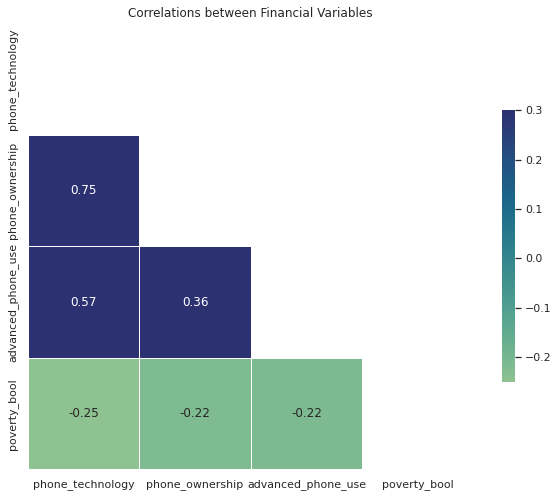

In [30]:
#Comparing Phone
#Keeping Phone Technology

compare = poverty_clean[['phone_technology',
       'phone_ownership', 'advanced_phone_use',"poverty_bool"]]

correlation= compare.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap="crest", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations between Financial Variables')

In [32]:
#Selecting final variables for analysis
poverty = poverty_clean[['poverty_bool',"poverty_probability",'country',"country_n", 'is_urban', "age_groups","age_groups_n", 'female', 'married', 'religion_clean', 'religion_n',
       'relationship_to_hh_head', 'relationship_to_hh_head_n', 'education_level','literacy',"employment_type_last_year_n",
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings','has_insurance',
       'has_investment', 'num_shocks_last_year','phone_technology', 
       'num_financial_activities_last_year', 'math_skill']]

In [33]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12050 entries, 0 to 12599
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   poverty_bool                        12050 non-null  int64  
 1   poverty_probability                 12050 non-null  float64
 2   country                             12050 non-null  object 
 3   country_n                           12050 non-null  int64  
 4   is_urban                            12050 non-null  int64  
 5   age_groups                          12050 non-null  object 
 6   age_groups_n                        12050 non-null  int64  
 7   female                              12050 non-null  int64  
 8   married                             12050 non-null  int64  
 9   religion_clean                      12050 non-null  object 
 10  religion_n                          12050 non-null  int64  
 11  relationship_to_hh_head             12050

In [34]:
poverty.groupby(["poverty_bool"])[["poverty_probability"]].min()

,poverty_probability
poverty_bool,
0,0.000
1,0.506


# Visualizations


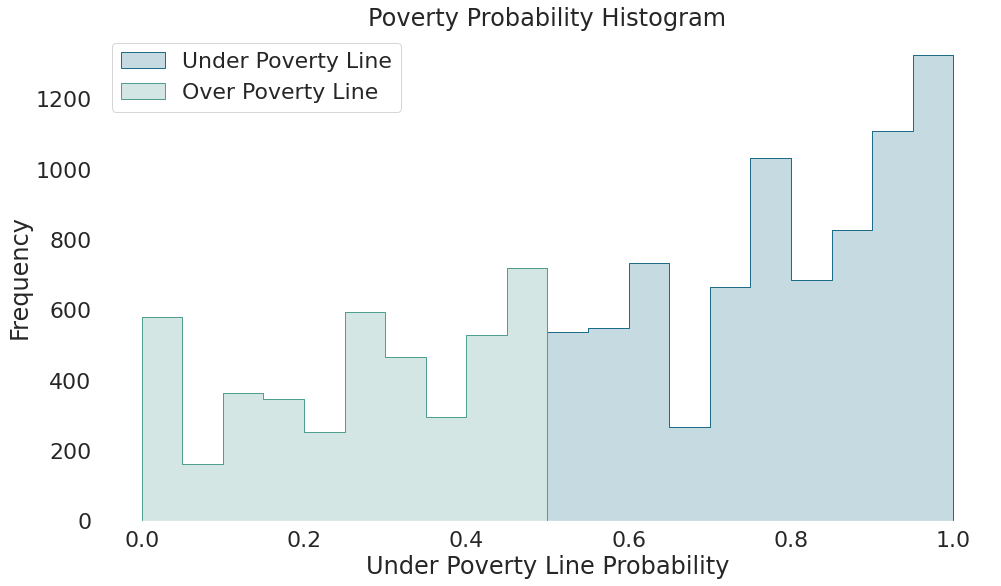

In [40]:
ax = sns.histplot(data=poverty, x="poverty_probability", hue = "poverty_bool", element = "step", bins = 20, palette = "crest")
ax.set(title='Poverty Probability Histogram')
ax.set(xlabel='Under Poverty Line Probability', ylabel='Frequency')
ax.legend(['Under Poverty Line', 'Over Poverty Line'], loc = "upper left" )
plt.show()


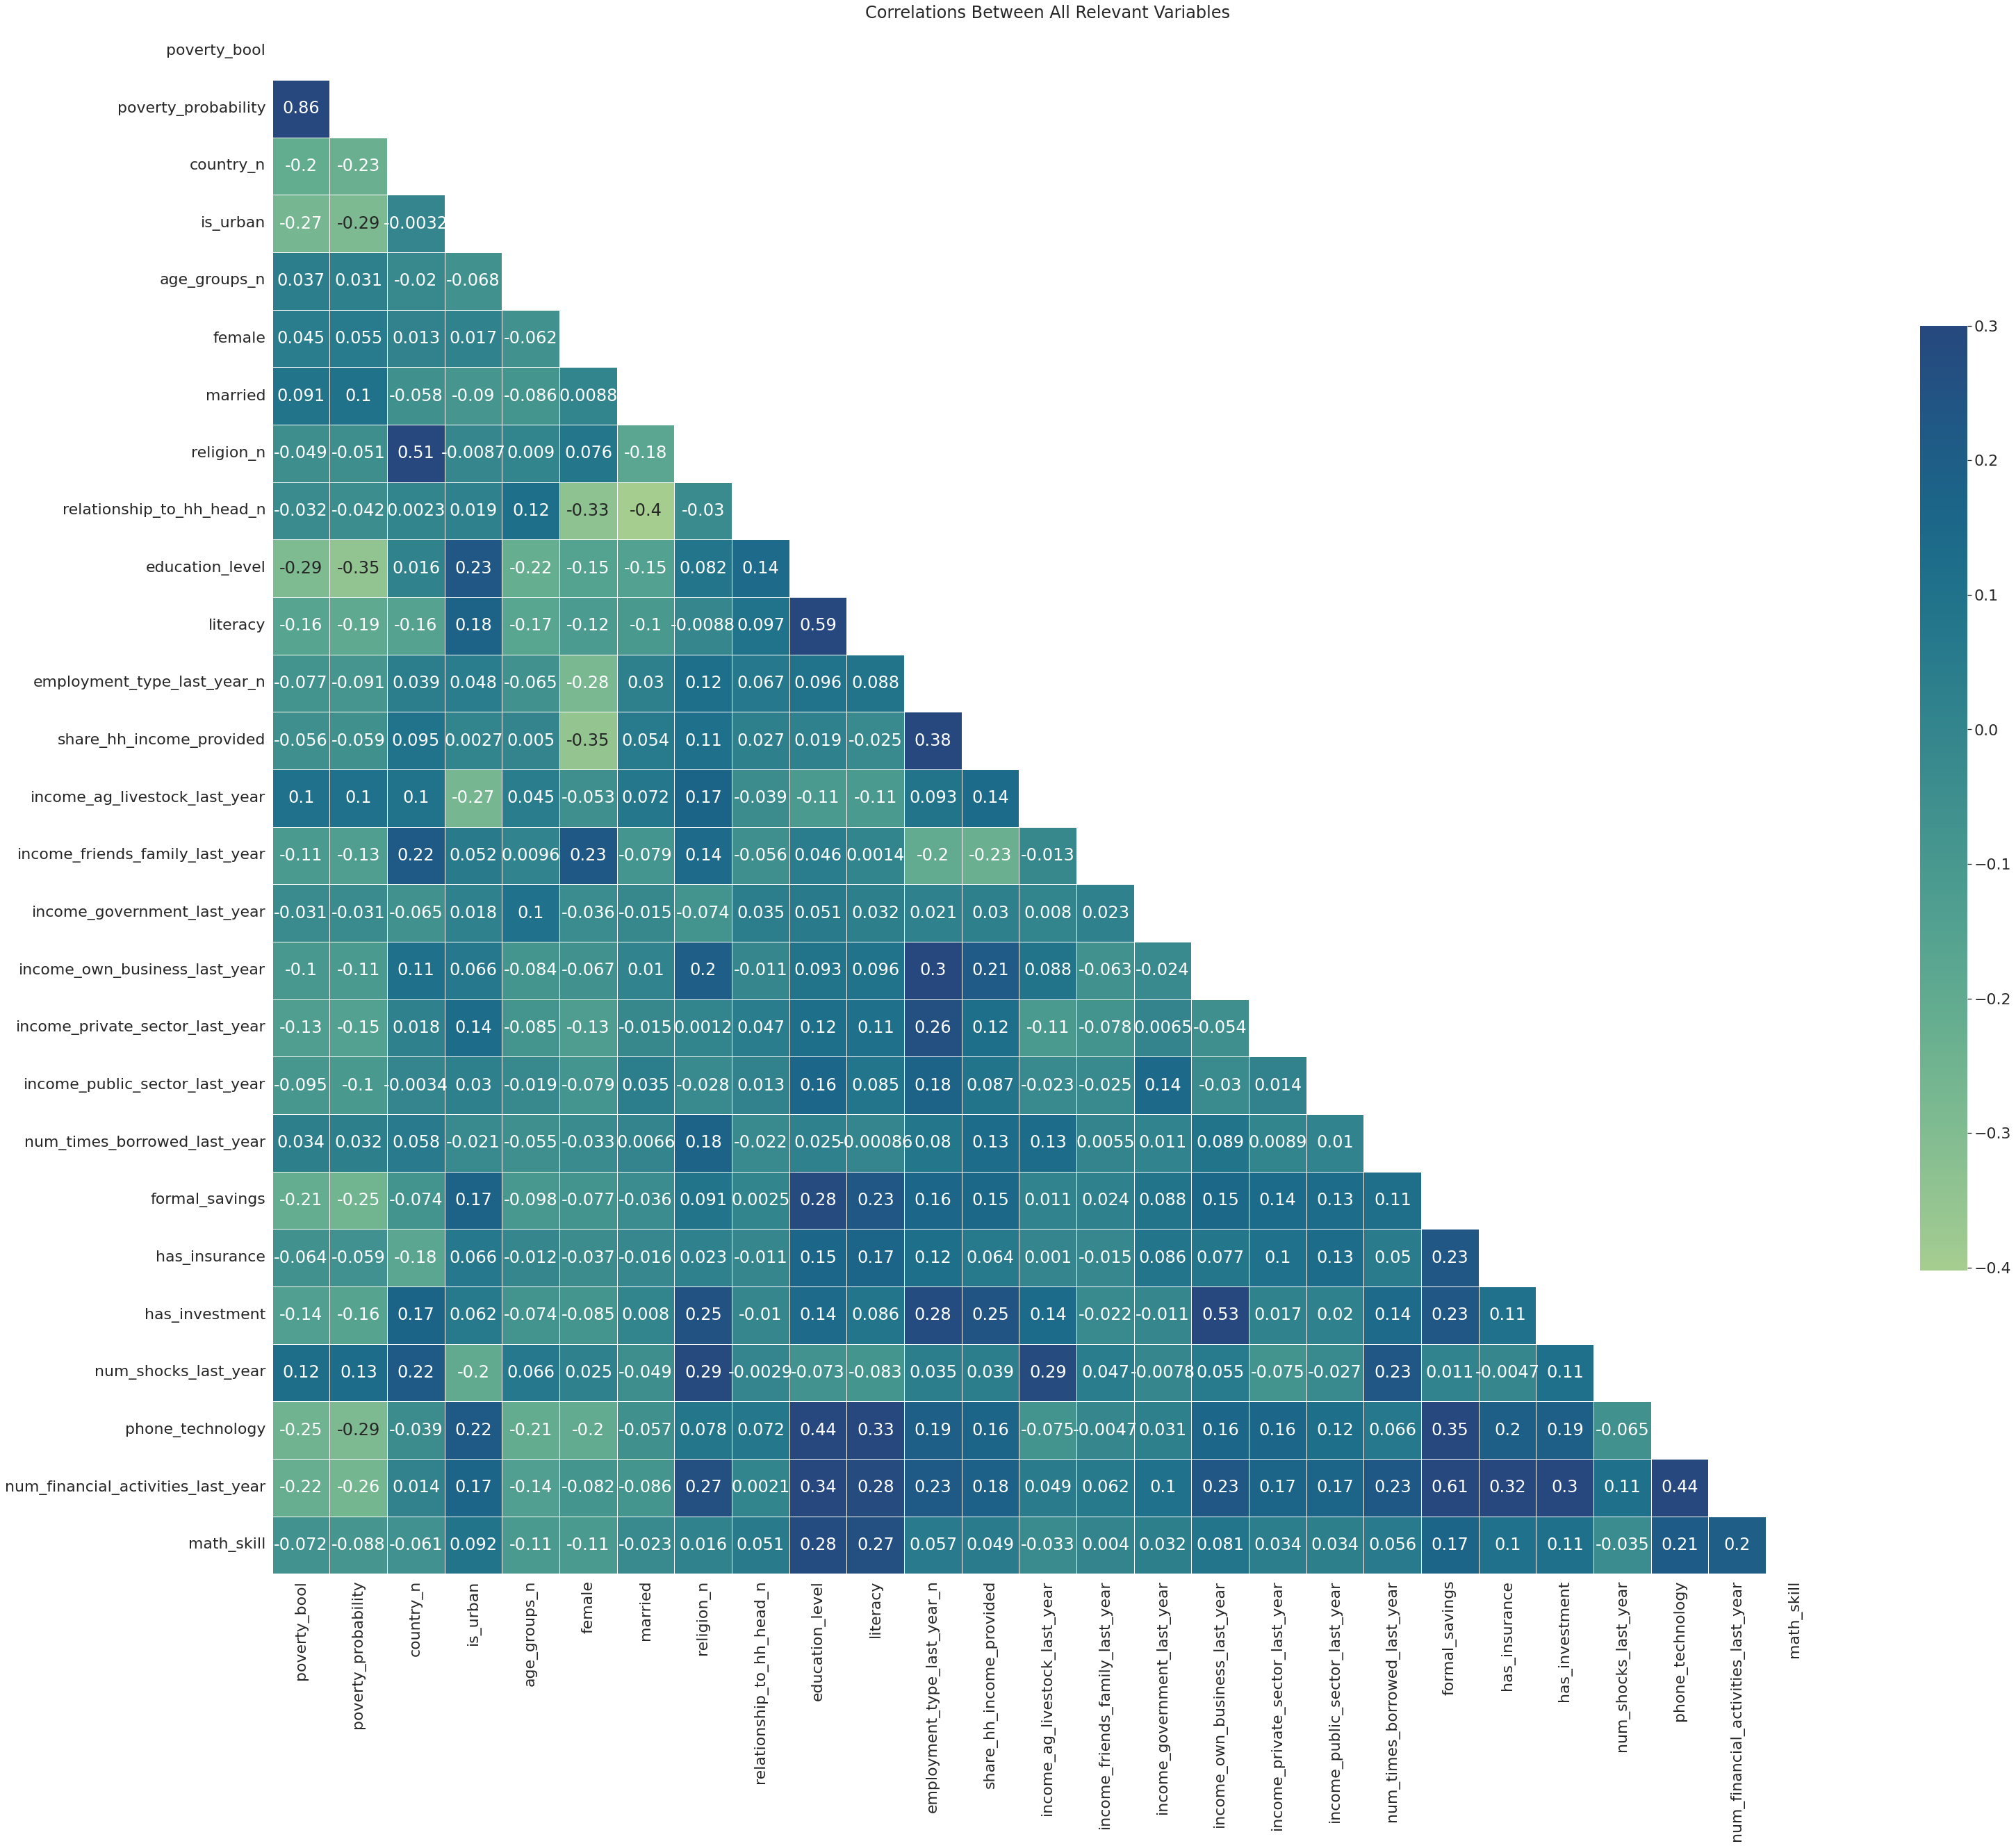

In [39]:
correlation= poverty.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=2)
f, ax = plt.subplots(figsize=(50, 50))
cmap = sns.diverging_palette(240, 10, n=9)
fig9 = sns.heatmap(correlation, annot=True, mask=mask, cmap="crest", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlations Between All Relevant Variables')
      


In [42]:
female = poverty.groupby(["female"])[["female"]].count()
female["bool"] = female.index
married = poverty.groupby(["married"])[["married"]].count()
married["bool"] = married.index
urban = poverty.groupby(["is_urban"])[["is_urban"]].count()
urban["bool"] = urban.index
literacy = poverty.groupby(["literacy"])[["literacy"]].count()
literacy["bool"] = literacy.index
poverty_group = poverty.groupby(["poverty_bool"])[["poverty_bool"]].count()
poverty_group["bool"] = poverty_group.index

total = female.merge(married, left_on='bool', right_on='bool')
total = total.merge(urban, left_on='bool', right_on='bool')
total = total.merge(literacy, left_on='bool', right_on='bool')
total = total.merge(poverty_group, left_on='bool', right_on='bool')

total = pd.melt(total, id_vars =['bool'], value_vars =['female',"married","is_urban","literacy","poverty_bool"])

total = total.replace("female","Is Female")
total = total.replace("married","Is Married")
total = total.replace("is_urban","Is Urban")
total = total.replace("literacy","Is Literate")
total = total.replace("poverty_bool","Is Under Poverty Line")




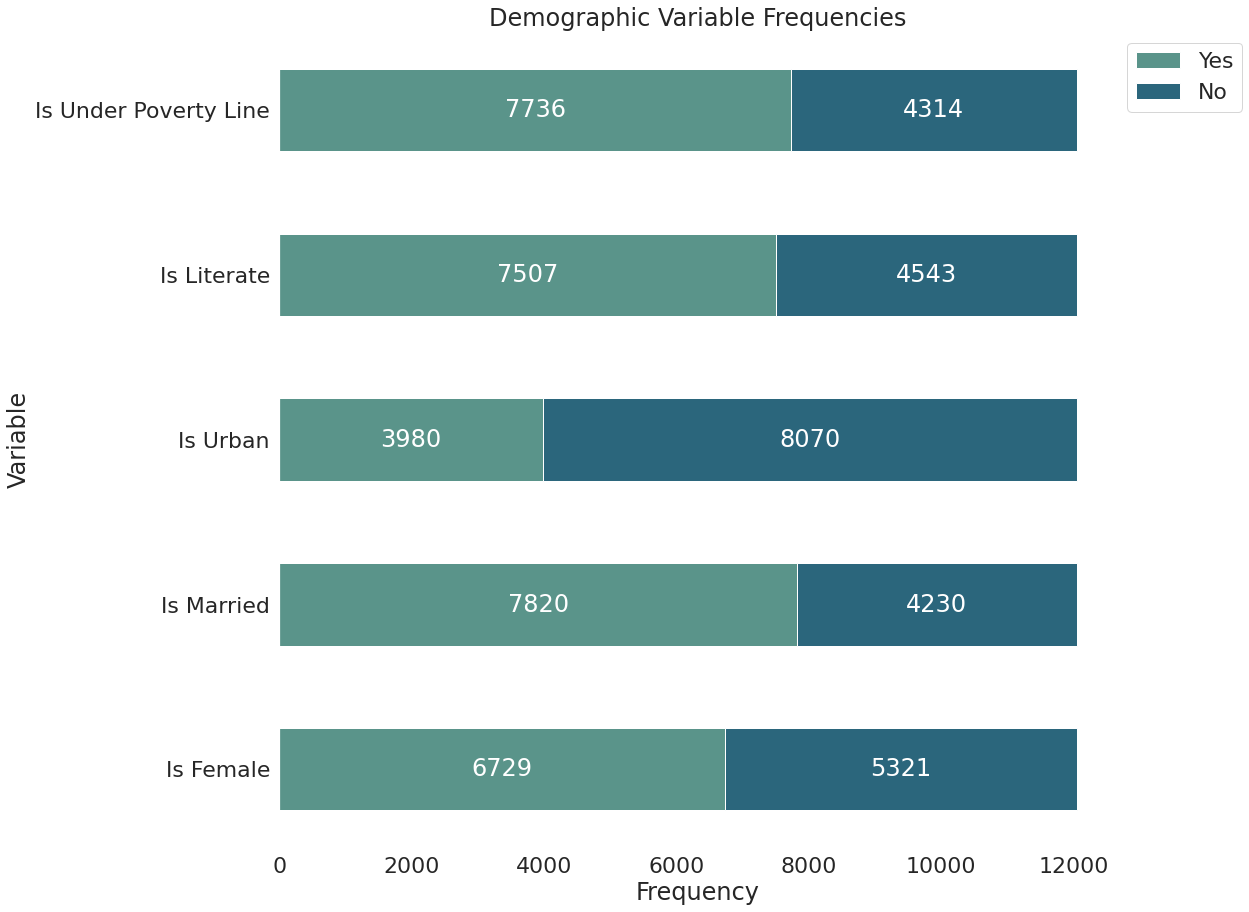

In [49]:
labels = pd.unique(total["variable"])

no_totals = total[total["bool"] == 0]["value"]
yes_totals = total[total["bool"] == 1]["value"]

fig, ax = plt.subplots(figsize = (15,15))
width = 0.5

color1 = ["#5A948A"]
color2 = ["#2B667C"]

ax.set_facecolor('white')
p1 = ax.barh(labels, yes_totals, width, label = "Yes", color = color1)
p2 = ax.barh(labels, no_totals, width, label = "No", left = yes_totals, color = color2)
ax.bar_label(p1, label_type = "center", color = "white")
ax.bar_label(p2, label_type = "center", color = "white")
ax.legend(bbox_to_anchor=(1, 1))

ax.set(title='Demographic Variable Frequencies')
ax.set(xlabel='Frequency', ylabel='Variable')


plt.show()

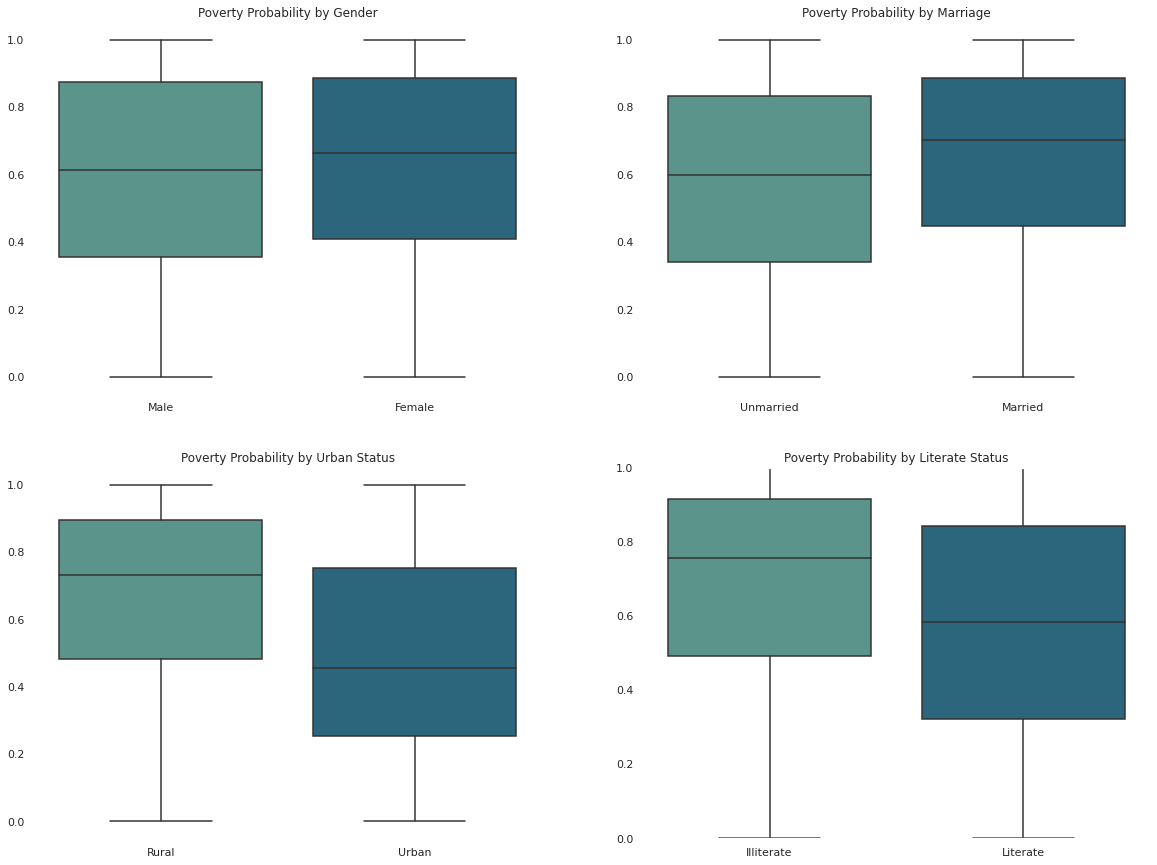

In [60]:
fig, axes = plt.subplots(2, 2,figsize= (20, 15))

X = poverty["female"]
Y = poverty["poverty_probability"]
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.boxplot(ax=axes[0][0],data=poverty, x=X, y=Y,palette = "crest")
ax.set(title='Poverty Probability by Gender')
ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(["Male","Female"])
plt.ylim(0, 1)

X = poverty["married"]
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.boxplot(ax=axes[0][1],data=poverty, x=X, y=Y,palette = "crest")
ax.set(title='Poverty Probability by Marriage')
ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(["Unmarried","Married"])

X = poverty["is_urban"]
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.boxplot(ax=axes[1][0],data=poverty, x=X, y=Y,palette = "crest")
ax.set(title='Poverty Probability by Urban Status')
ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(["Rural","Urban"])
plt.ylim(0, 1)

X = poverty["literacy"]
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.boxplot(ax=axes[1][1],data=poverty, x=X, y=Y,palette = "crest")
ax.set(title='Poverty Probability by Literate Status')
ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(["Illiterate","Literate"])
plt.ylim(0, 1)

plt.show()


In [51]:
income = poverty[['income_ag_livestock_last_year', 'income_friends_family_last_year','income_government_last_year', 
                  'income_own_business_last_year','income_private_sector_last_year', 'income_public_sector_last_year',"poverty_bool"]]
income.groupby(["income_ag_livestock_last_year"])[["poverty_bool"]].mean() #repeat for each income group

,poverty_bool
income_ag_livestock_last_year,
0,0.603528
1,0.706274


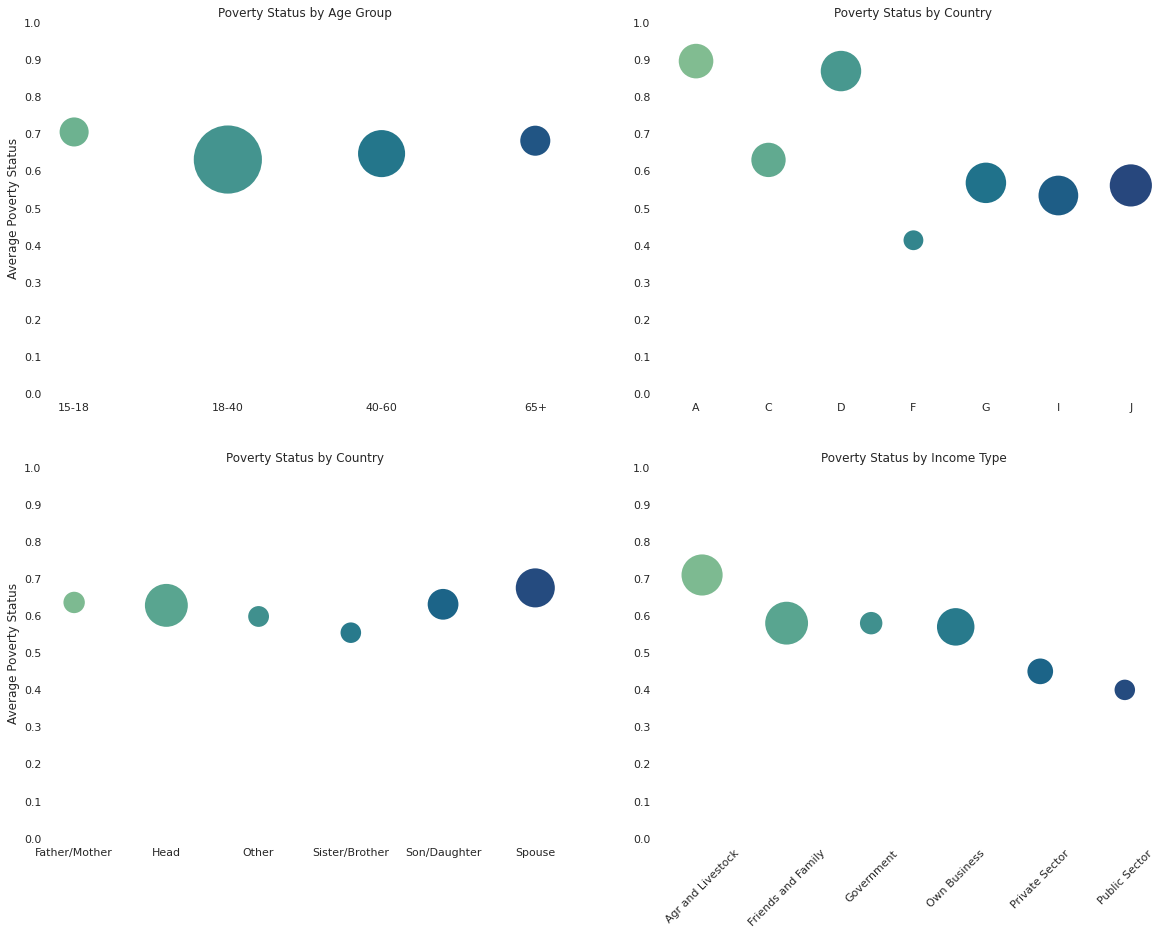

In [53]:
fig, axes = plt.subplots(2, 2,figsize= (20, 15))

age_mean = poverty.groupby(["age_groups"])[["poverty_bool"]].mean()
age_mean["Age"] = age_mean.index
age_count = poverty.groupby(["age_groups"])[["age_groups"]].count()
age_count["Age"] = age_count.index
age = age_count.merge(age_mean, left_on='Age', right_on='Age')

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.scatterplot(ax=axes[0][0],data = age, x="Age", y="poverty_bool", size="age_groups", legend=False, sizes=(1000, 5000),palette = "crest",hue = "Age")
ax.set(title='Poverty Status by Age Group')
ax.set(xlabel=None, ylabel='Average Poverty Status')
ax.set_yticks(np.arange(0,1.1,.1))

country_mean = poverty.groupby(["country"])[["poverty_bool"]].mean()
country_mean["Country Name"] = country_mean.index
country_count = poverty.groupby(["country"])[["country"]].count()
country_count["Country Name"] = country_count.index
country = country_count.merge(country_mean, left_on='Country Name', right_on='Country Name')

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.scatterplot(ax=axes[0][1],data = country, x="Country Name", y="poverty_bool", size="country", legend=False, sizes=(500, 2000),palette = "crest",hue = "Country Name")
ax.set(title='Poverty Status by Country')
ax.set(xlabel=None, ylabel=None)
ax.set_yticks(np.arange(0,1.1,.1))
ax.set_xticks([-.5,0,1,2,3,4,5,6,6.5])
ax.set_xticklabels(["","A","C","D","F","G","I","J",""])

hh_mean = poverty.groupby(["relationship_to_hh_head"])[["poverty_bool"]].mean()
hh_mean["Relationship"] = hh_mean.index
hh_count = poverty.groupby(["relationship_to_hh_head"])[["relationship_to_hh_head"]].count()
hh_count["Relationship"] = hh_count.index
hh = hh_count.merge(hh_mean, left_on='Relationship', right_on='Relationship')

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.scatterplot(ax=axes[1][0],data = hh, x="Relationship", y="poverty_bool", size="relationship_to_hh_head", legend=False, sizes=(500, 2000),palette = "crest",hue = "Relationship")
ax.set(title='Poverty Status by Country')
ax.set(xlabel=None, ylabel='Average Poverty Status')
ax.set_yticks(np.arange(0,1.1,.1))
plt.xticks(rotation=45)


poverty_levels = [0.71,0.58,0.58,0.57,0.45,0.40]
income_values = [income["income_ag_livestock_last_year"].sum(),income["income_friends_family_last_year"].sum(),income["income_government_last_year"].sum(),
         income["income_own_business_last_year"].sum(),income["income_private_sector_last_year"].sum(),income["income_public_sector_last_year"].sum()]
labels = ["Agr and Livestock","Friends and Family","Government","Own Business","Private Sector","Public Sector"]
ax = sns.scatterplot(ax=axes[1][1],x=labels, y=poverty_levels, size=income_values, legend=False, sizes=(500, 2000),palette = "crest",hue = labels)
ax.set(title='Poverty Status by Income Type')
ax.set(xlabel=None, ylabel=None)
plt.xticks(rotation=45)
ax.set_yticks(np.arange(0,1.1,.1))
ax.set_xticks([-.5,0,1,2,3,4,5,5.5])
ax.set_xticklabels(["","Agr and Livestock","Friends and Family","Government","Own Business","Private Sector","Public Sector",""])

plt.show()

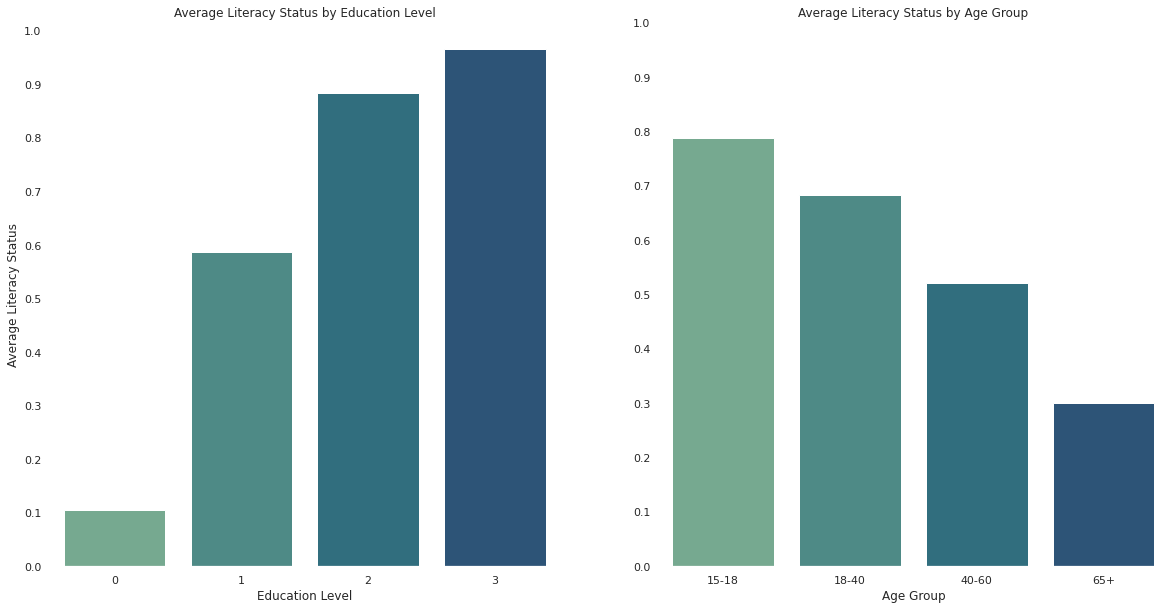

In [54]:
fig, axes = plt.subplots(1, 2,figsize= (20, 10))

education = poverty.groupby(["education_level"])[["literacy"]].mean()
education["Education Level"] = education.index
education = education.astype({'Education Level':'int'})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.barplot(ax = axes[0],data=education, x="Education Level", y="literacy", palette = "crest")
ax.set(title='Average Literacy Status by Education Level')
ax.set(xlabel='Education Level', ylabel='Average Literacy Status')
ax.set_yticks(np.arange(0,1.1,.1))

age = poverty.groupby(["age_groups"])[["literacy"]].mean()
age["Age Group"] = age.index
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.color_palette("crest", as_cmap=True)
ax = sns.barplot(ax = axes[1], data=age, x="Age Group", y="literacy", palette = "crest")
ax.set(title='Average Literacy Status by Age Group')
ax.set(xlabel='Age Group', ylabel=None)
ax.set_yticks(np.arange(0,1.1,.1))

plt.show()


<AxesSubplot:xlabel='num_financial_activities_last_year', ylabel='Count'>

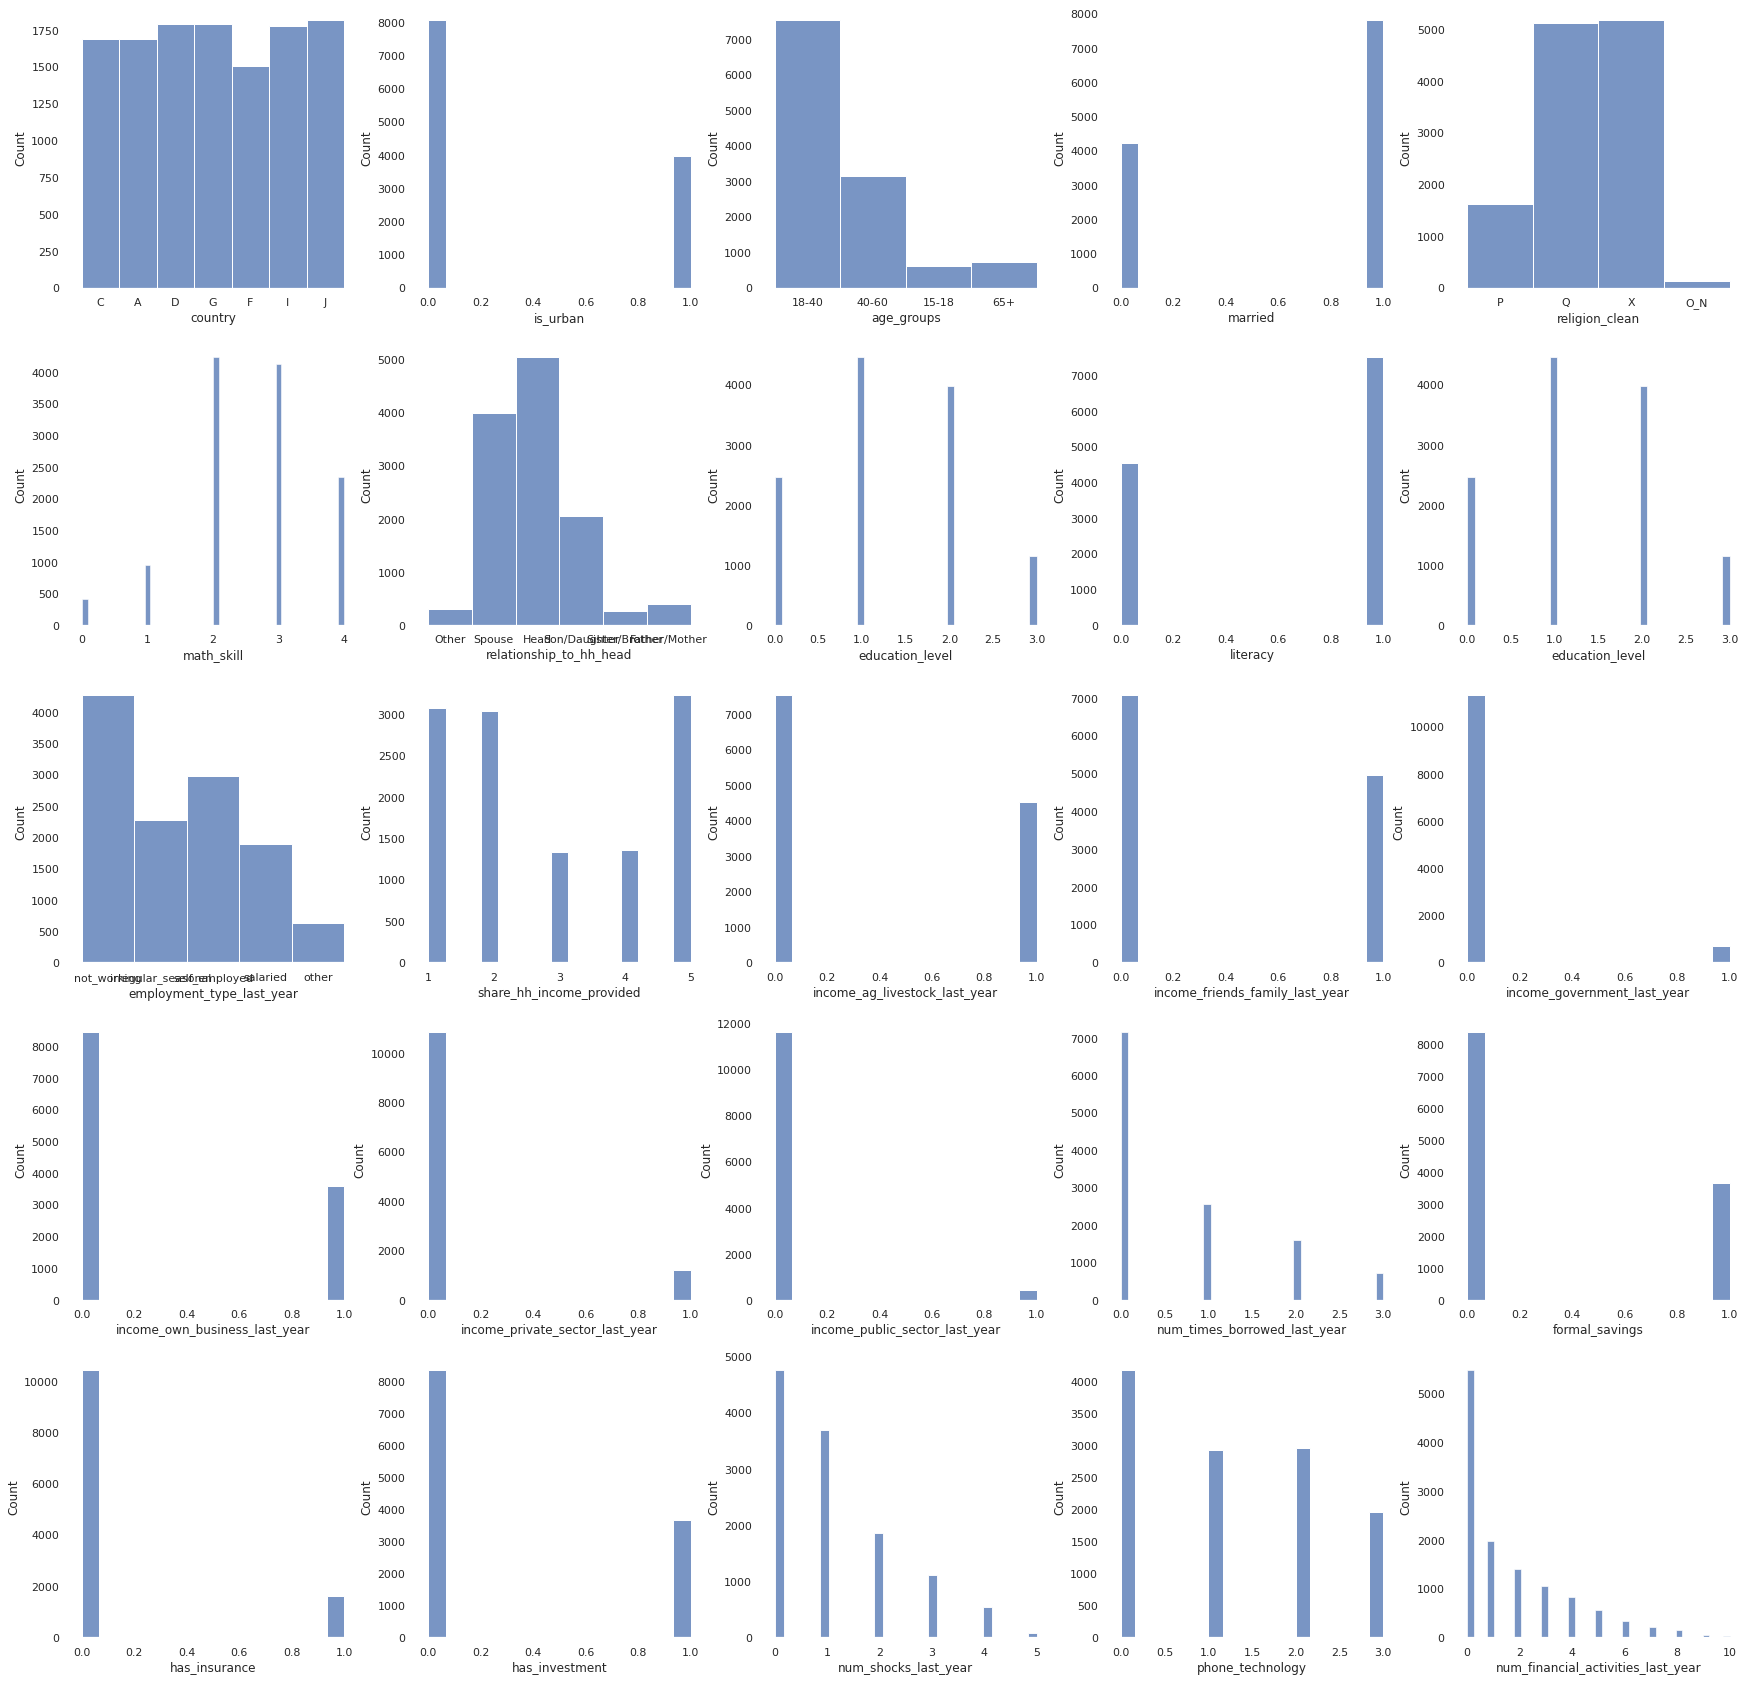

In [57]:
fig, axes = plt.subplots(5, 5, figsize=(30, 30))
sns.histplot(ax=axes[0,0],data=poverty, x="country")
sns.histplot(ax=axes[0,1],data=poverty, x="is_urban")
sns.histplot(ax=axes[0,2],data=poverty, x="age_groups")
sns.histplot(ax=axes[0,3],data=poverty, x="married")
sns.histplot(ax=axes[0,4],data=poverty, x="religion_clean")
sns.histplot(ax=axes[1,0],data=poverty, x="math_skill")
sns.histplot(ax=axes[1,1],data=poverty, x="relationship_to_hh_head")
sns.histplot(ax=axes[1,2],data=poverty, x="education_level")
sns.histplot(ax=axes[1,3],data=poverty, x="literacy")
sns.histplot(ax=axes[1,4],data=poverty, x="education_level")
sns.histplot(ax=axes[2,0],data=poverty, x="employment_type_last_year")
sns.histplot(ax=axes[2,1],data=poverty, x="share_hh_income_provided")
sns.histplot(ax=axes[2,2],data=poverty, x="income_ag_livestock_last_year")
sns.histplot(ax=axes[2,3],data=poverty, x="income_friends_family_last_year")
sns.histplot(ax=axes[2,4],data=poverty, x="income_government_last_year")
sns.histplot(ax=axes[3,0],data=poverty, x="income_own_business_last_year")
sns.histplot(ax=axes[3,1],data=poverty, x="income_private_sector_last_year")
sns.histplot(ax=axes[3,2],data=poverty, x="income_public_sector_last_year")
sns.histplot(ax=axes[3,3],data=poverty, x="num_times_borrowed_last_year")
sns.histplot(ax=axes[3,4],data=poverty, x="formal_savings")
sns.histplot(ax=axes[4,0],data=poverty, x="has_insurance")
sns.histplot(ax=axes[4,1],data=poverty, x="has_investment")
sns.histplot(ax=axes[4,2],data=poverty, x="num_shocks_last_year")
sns.histplot(ax=axes[4,3],data=poverty, x="phone_technology")
sns.histplot(ax=axes[4,4],data=poverty, x="num_financial_activities_last_year")



# Modeling



In [58]:
#Creating X values for modeling, and scaling Min/Max

X = poverty[['country_n', 'is_urban', 'age_groups_n',
       'female', 'married', 'religion_n','relationship_to_hh_head_n',
       'education_level', 'literacy', 'employment_type_last_year_n','share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings', 'has_insurance',
       'has_investment', 'num_shocks_last_year', 'phone_technology',
       'num_financial_activities_last_year', 'math_skill']].values
y = poverty['poverty_bool'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20,test_size=0.3,train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=20,test_size=0.3,train_size=0.7)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# KNN

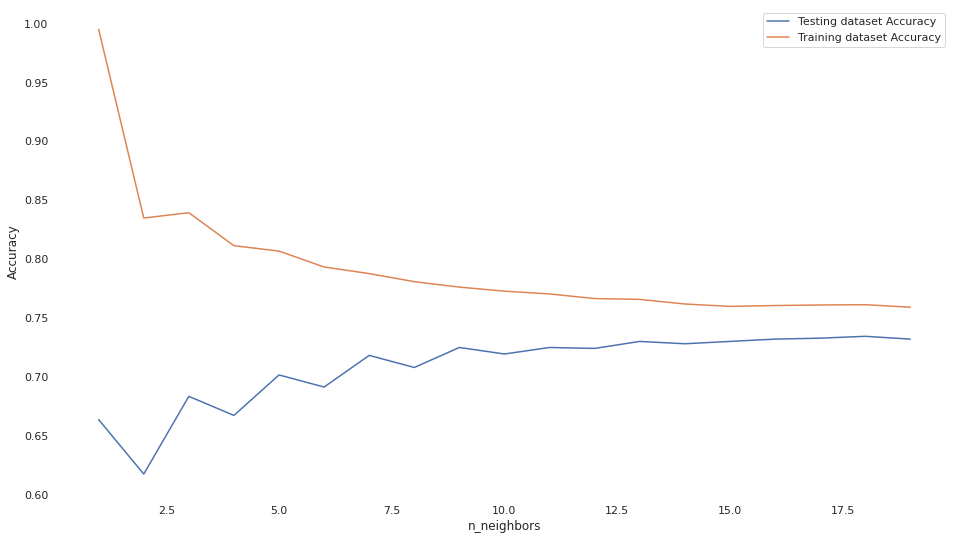

In [59]:
#Reviewing ideal number of neighbors for KNN
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)
	
	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [62]:
#Testing KNN vs Validation

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

actual = y_val
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_val, y_pred)
print(con_matrix)
print(class_report)

class_dict = metrics.classification_report(y_val, y_pred,output_dict=True)
knn_accuracy = class_dict["accuracy"]
knn_macro_avg = class_dict["macro avg"]["f1-score"]
knn_precision = class_dict["macro avg"]["precision"]
knn_recall = class_dict["macro avg"]["recall"]

[[211 198]
 [ 89 587]]
              precision    recall  f1-score   support

           0       0.70      0.52      0.60       409
           1       0.75      0.87      0.80       676

    accuracy                           0.74      1085
   macro avg       0.73      0.69      0.70      1085
weighted avg       0.73      0.74      0.73      1085



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


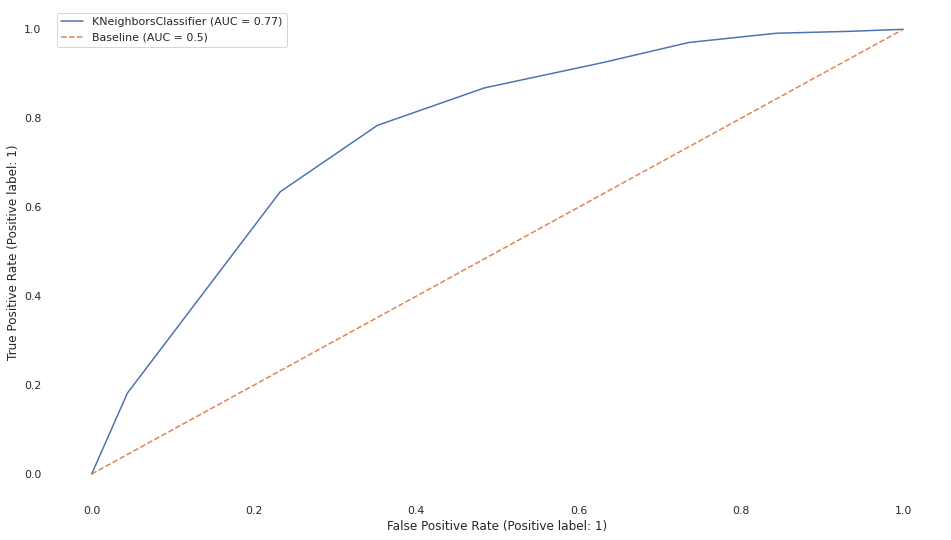

In [68]:
#ROC Curve

ax.set_facecolor('white')
plot_roc_curve(knn, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

knn_roc = 0.77

# Decision Tree

In [ ]:
#Testing model vs Test Group to find ideal depth

depth = 6 

tree_clf = DecisionTreeClassifier(max_depth=depth)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 456  455]
 [ 186 1433]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       911
           1       0.76      0.89      0.82      1619

    accuracy                           0.75      2530
   macro avg       0.73      0.69      0.70      2530
weighted avg       0.74      0.75      0.73      2530



In [63]:
#Validation Model, 6 depth is the best

depth = 6 

tree_clf = DecisionTreeClassifier(max_depth=depth)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_val)

actual = y_val
predicted = y_val

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_val, y_pred)
print(con_matrix)
print(class_report)

class_dict = metrics.classification_report(y_val, y_pred,output_dict=True)
dt_accuracy = class_dict["accuracy"]
dt_macro_avg = class_dict["macro avg"]["f1-score"]
dt_precision = class_dict["macro avg"]["precision"]
dt_recall = class_dict["macro avg"]["recall"]

[[409   0]
 [  0 676]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.59       409
           1       0.75      0.89      0.81       676

    accuracy                           0.74      1085
   macro avg       0.74      0.70      0.70      1085
weighted avg       0.74      0.74      0.73      1085



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


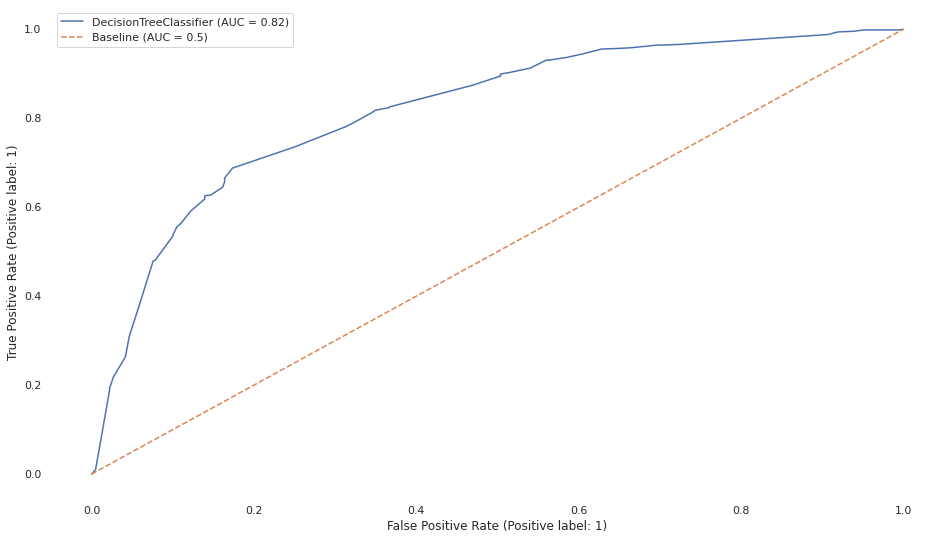

In [69]:
#ROC Curve Decision Tree

plot_roc_curve(tree_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
dt_roc = 0.82

# Random Forest

In [ ]:
#Original Random Forest model, used to find ideal n_estimators number

n = 5000

rndf_clf = RandomForestClassifier(n_estimators=n)
rndf_clf.fit(X_train, y_train)

y_pred = rndf_clf.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 519  392]
 [ 200 1419]]
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       911
           1       0.78      0.88      0.83      1619

    accuracy                           0.77      2530
   macro avg       0.75      0.72      0.73      2530
weighted avg       0.76      0.77      0.76      2530



In [ ]:
#Grid Search to find ideal parameters

space = dict()
space['n_estimators'] = [5000]
space['max_features'] = ["auto","sqrt"]
space['bootstrap']=[True,False]
search = GridSearchCV(rndf_clf , space, scoring='accuracy')

In [ ]:
result = search.fit(X_train, y_train)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Mejores hiperparametros: %s' % result.best_params_)

Best Score: 0.765619442797866
Mejores hiperparametros: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 5000}


In [75]:
#Validation model

rndf_clf = RandomForestClassifier(n_estimators=5000,max_features = "sqrt",bootstrap = True,)
rndf_clf.fit(X_train, y_train)

y_pred = rndf_clf.predict(X_val)

actual = y_val
predicted = y_pred

con_matrix_rf = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_val, y_pred)
print(con_matrix_rf)
print(class_report)

class_dict = metrics.classification_report(y_val, y_pred,output_dict=True)
rf_accuracy = class_dict["accuracy"]
rf_macro_avg = class_dict["macro avg"]["f1-score"]
rf_precision = class_dict["macro avg"]["precision"]
rf_recall = class_dict["macro avg"]["recall"]



[[236 173]
 [ 82 594]]
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       409
           1       0.77      0.88      0.82       676

    accuracy                           0.76      1085
   macro avg       0.76      0.73      0.74      1085
weighted avg       0.76      0.76      0.76      1085



In [74]:
#Savings metrics

rf_1_precision = class_dict["1"]["precision"]
rf_1_recall = class_dict["1"]["recall"]
rf_1_f1 = class_dict["1"]["f1-score"]
rf_0_precision = class_dict["0"]["precision"]
rf_0_recall = class_dict["0"]["recall"]
rf_0_f1 = class_dict["0"]["f1-score"]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


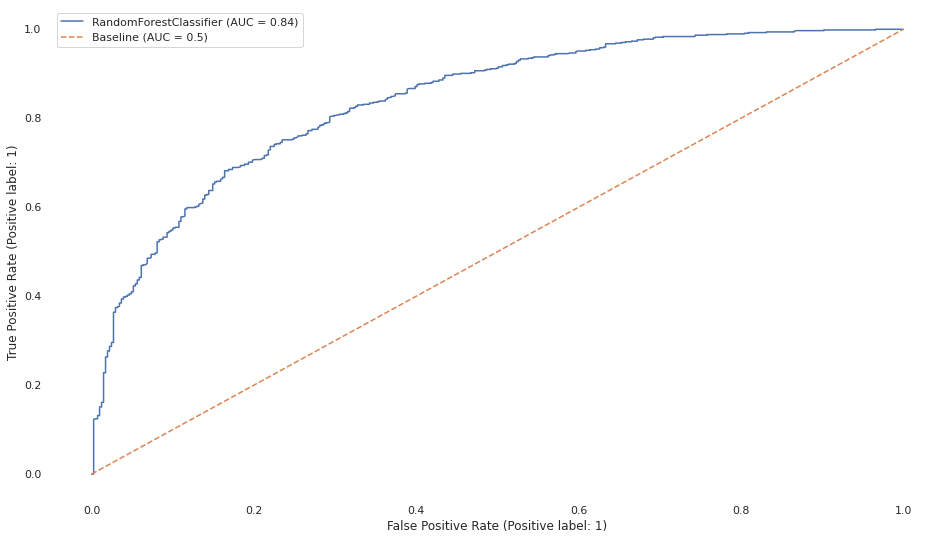

In [70]:
#ROC Curve Random Forest

plot_roc_curve(rndf_clf, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

rf_roc = 0.84

# Logit

In [ ]:
#Original Logit model

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

actual = y_test
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_test, y_pred)
print(con_matrix)
print(class_report)

[[ 467  444]
 [ 208 1411]]
              precision    recall  f1-score   support

           0       0.69      0.51      0.59       911
           1       0.76      0.87      0.81      1619

    accuracy                           0.74      2530
   macro avg       0.73      0.69      0.70      2530
weighted avg       0.74      0.74      0.73      2530



In [ ]:
#Grid search to find ideal parameters 

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-1, 1, 100,500]
space['class_weight']=["balanced","unbalanced"]
space['tol']= [1e-5, 1e-1, 1, 100,500]
space['warm_start']= [True,False]
space['fit_intercept']= [True,False]
search = GridSearchCV(log_reg , space, scoring='accuracy')

In [ ]:
result = search.fit(X_train, y_train)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Mejores hiperparametros: %s' % result.best_params_)

Best Score: 0.7518672199170124
Mejores hiperparametros: {'C': 1e-05, 'class_weight': 'unbalanced', 'fit_intercept': True, 'penalty': 'none', 'solver': 'lbfgs', 'tol': 1, 'warm_start': True}


In [66]:
#Validation model

log_reg = LogisticRegression(C=1e-05, class_weight= "unbalanced", fit_intercept= True, penalty= "none", solver= 'lbfgs', tol= 1, warm_start= True)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_val)

actual = y_val
predicted = y_pred

con_matrix = metrics.confusion_matrix(actual, predicted)
class_report = metrics.classification_report(y_val, y_pred)
print(con_matrix)
print(class_report)

class_dict = metrics.classification_report(y_val, y_pred,output_dict=True)
log_accuracy = class_dict["accuracy"]
log_macro_avg = class_dict["macro avg"]["f1-score"]
log_precision = class_dict["macro avg"]["precision"]
log_recall = class_dict["macro avg"]["recall"]

[[218 191]
 [ 75 601]]
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       409
           1       0.76      0.89      0.82       676

    accuracy                           0.75      1085
   macro avg       0.75      0.71      0.72      1085
weighted avg       0.75      0.75      0.74      1085



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


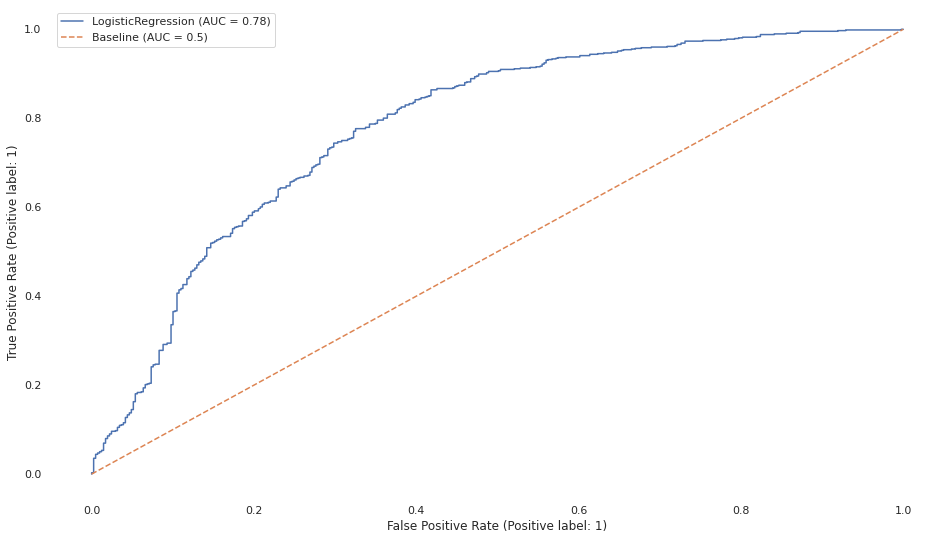

In [71]:
#ROC Curve Logit

plot_roc_curve(log_reg, X_val, y_val)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

log_roc = 0.78

# Results

In [72]:
#Creating results table

knn_accuracy = round(knn_accuracy,2)
knn_precision = round(knn_precision,2)
knn_recall = round(knn_recall,2)

dt_accuracy = round(dt_accuracy,2)
dt_precision = round(dt_precision,2)
dt_recall = round(dt_recall,2)

rf_accuracy = round(rf_accuracy,2)
rf_precision = round(rf_precision,2)
rf_recall = round(rf_recall,2)

log_accuracy = round(log_accuracy,2)
log_precision = round(log_precision,2)
log_recall = round(log_recall,2)

table_2 = go.Figure(data=[go.Table(header=dict(values=['Metrics', 'KNN',"Decision Tree","Random Forest","Logit"]),
                 cells=dict(values=[["Accuracy", "Precision", "Recall","AUC Value"], 
                                    [knn_accuracy, knn_precision, knn_recall,knn_roc],
                                    [dt_accuracy, dt_precision, dt_recall, dt_roc],
                                    [rf_accuracy, rf_precision, rf_recall, rf_roc],
                                    [log_accuracy, log_precision, log_recall, log_roc]],
                                fill=dict(color=['paleturquoise', 'white',"white","white"]),
                                line_color='darkslategray'
                                ))
                     ])
table_2.show()

In [76]:
#Results table for Random Forest

rf_1_precision = round(rf_1_precision,2)
rf_1_recall = round(rf_1_recall,2)
rf_1_f1 = round(rf_1_f1,2)
rf_0_precision = round(rf_0_precision,2)
rf_0_recall = round(rf_0_recall,2)
rf_0_f1 = round(rf_0_f1,2)

table_2 = go.Figure(data=[go.Table(header=dict(values=['Metrics', 'Over Poverty Line',"Under Poverty Line"]),
                 cells=dict(values=[["Precision", "Recall", "F1-Score"], 
                                    [rf_0_precision, rf_0_recall,rf_0_f1],
                                    [rf_1_precision, rf_1_recall,rf_1_f1]],
                                fill=dict(color=['paleturquoise', 'white',"white"]),
                                line_color='darkslategray'
                                ))
                     ])
table_2.show()

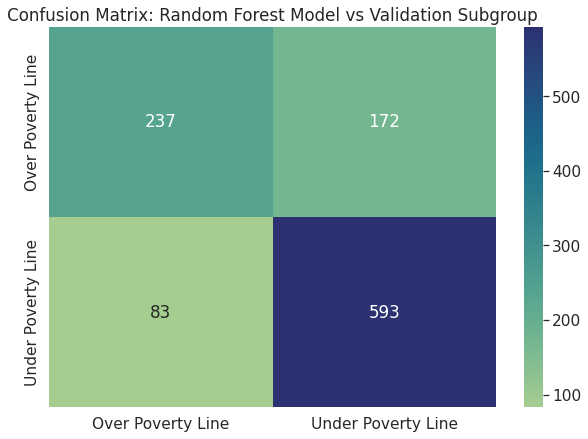

In [ ]:
#Confusion Matrix for Random Forest

df_cm = pd.DataFrame(con_matrix_rf, range(2), range(2))
plt.figure(figsize=(10,7))


sns.set(font_scale=1.4) # for label size

ax = sns.heatmap(df_cm, annot=True,cmap="crest",fmt='g') # font size
ax.set_yticklabels(["Over Poverty Line","Under Poverty Line"])
ax.set_xticklabels(["Over Poverty Line","Under Poverty Line"])
ax.set(title='Confusion Matrix: Random Forest Model vs Validation Subgroup')
plt.show()